# Определение перспективного тарифа для телеком-компании

***ОПИСАНИЕ ПРОЕКТА***

Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Нам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Описание тарифов

1)Тариф «Смарт»

-Ежемесячная плата: 550 рублей 

-Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

-Стоимость услуг сверх тарифного пакета:

-минута разговора: 3 рубля

-сообщение: 3 рубля

-1 Гб интернет-трафика: 200 рублей

2)Тариф «Ультра»

-Ежемесячная плата: 1950 рублей

-Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

-Стоимость услуг сверх тарифного пакета:

-минута разговора: 1 рубль

-сообщение: 1 рубль

-1 Гб интернет-трафика: 150 рублей


Путь к файлам:

/datasets/calls.csv 

/datasets/internet.csv

/datasets/messages.csv 

/datasets/tariffs.csv 

/datasets/users.csv



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as st

In [2]:
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
#загрузим датасуты
calls = pd.read_csv('/datasets/calls.csv')
internet = pd.read_csv('/datasets/internet.csv',index_col=0)
messages = pd.read_csv('/datasets/messages.csv')
tariffs = pd.read_csv('/datasets/tariffs.csv')
users = pd.read_csv('/datasets/users.csv')

In [4]:
#посмотрим таблицу со звонками
calls.head(10)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [5]:
calls.describe()

,duration,user_id
count,"202,607.00","202,607.00"
mean,6.76,"1,253.94"
std,5.84,144.72
min,0.00,"1,000.00"
25%,1.30,"1,126.00"
50%,6.00,"1,260.00"
75%,10.70,"1,379.00"
max,38.00,"1,499.00"


In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [7]:
#округлим значения
calls['id'] = calls['id'].astype('int')

In [8]:
calls['duration'] = calls['duration'].apply(np.ceil).astype('int')

In [9]:
#поменяем формат даты
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')

In [10]:
calls.head()

,id,call_date,duration,user_id
0,10000,2018-07-25,0,1000
1,10001,2018-08-17,0,1000
2,10002,2018-06-11,3,1000
3,10003,2018-09-21,14,1000
4,10004,2018-12-15,6,1000


Есть нулевые звонки, но возможно, что это пропущенные, удалять их не будем

In [11]:
#посмотрим таблицу с интернетом
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,"1,052.81",2018-09-07,1000
2,1000_2,"1,197.26",2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [12]:
internet.describe()

,mb_used,user_id
count,"149,396.00","149,396.00"
mean,370.19,"1,252.10"
std,278.30,144.05
min,0.00,"1,000.00"
25%,138.19,"1,130.00"
50%,348.01,"1,251.00"
75%,559.55,"1,380.00"
max,"1,724.83","1,499.00"


In [13]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [14]:
#округлим до целых
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')

In [15]:
internet['id'] = internet['id'].astype('int')

In [16]:
internet.head()

,id,mb_used,session_date,user_id
0,10000,112.95,2018-11-25,1000
1,10001,"1,052.81",2018-09-07,1000
2,10002,"1,197.26",2018-06-25,1000
3,10003,550.27,2018-08-22,1000
4,10004,302.56,2018-09-24,1000


In [17]:
#посмотрим таблицу с сообщениями
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [18]:
messages.describe()

,user_id
count,"123,036.00"
mean,"1,256.99"
std,143.52
min,"1,000.00"
25%,"1,134.00"
50%,"1,271.00"
75%,"1,381.00"
max,"1,499.00"


In [19]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


In [20]:
messages['id'] = messages['id'].astype('int')

In [21]:
messages['message_date'] = pd.to_datetime(messages['message_date'], format='%Y-%m-%d')

In [22]:
messages.head()

,id,message_date,user_id
0,10000,2018-06-27,1000
1,10001,2018-10-08,1000
2,10002,2018-08-04,1000
3,10003,2018-06-16,1000
4,10004,2018-12-05,1000


In [23]:
#посмотрим таблицу с тарифами
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [24]:
tariffs.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.00,2.00,2.00,2.00,2.00,2.00,2.00
mean,525.00,"23,040.00","1,750.00","1,250.00",175.00,2.00,2.00
std,671.75,"10,861.16","1,767.77",989.95,35.36,1.41,1.41
min,50.00,"15,360.00",500.00,550.00,150.00,1.00,1.00
25%,287.50,"19,200.00","1,125.00",900.00,162.50,1.50,1.50
50%,525.00,"23,040.00","1,750.00","1,250.00",175.00,2.00,2.00
75%,762.50,"26,880.00","2,375.00","1,600.00",187.50,2.50,2.50
max,"1,000.00","30,720.00","3,000.00","1,950.00",200.00,3.00,3.00


В тарифах все в порядке

In [25]:
#посморим таблицу с пользователями
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [26]:
users.describe()

,user_id,age
count,500.00,500.00
mean,"1,249.50",46.59
std,144.48,16.67
min,"1,000.00",18.00
25%,"1,124.75",32.00
50%,"1,249.50",46.00
75%,"1,374.25",62.00
max,"1,499.00",75.00


In [27]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


38 ушедших пользователей, приведем даты к датам

In [28]:
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')

In [29]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')

In [30]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


In [31]:
users.duplicated().sum()#помотрели дубликаты

0

Шаг 2. Подготовим данные

Посчитайте для каждого пользователя:

-количество сделанных звонков и израсходованных минут разговора по месяцам;

-количество отправленных сообщений по месяцам;

-объем израсходованного интернет-трафика по месяцам;

-помесячную выручку с каждого пользователя (вычтите бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; остаток умножьте на значение из тарифного плана; прибавьте абонентскую плату, соответствующую тарифному плану).

In [32]:
calls.head()

,id,call_date,duration,user_id
0,10000,2018-07-25,0,1000
1,10001,2018-08-17,0,1000
2,10002,2018-06-11,3,1000
3,10003,2018-09-21,14,1000
4,10004,2018-12-15,6,1000


In [33]:
pd.DatetimeIndex(calls['call_date']).year.unique()#проверили, все звонки в пределах 2018 года

Int64Index([2018], dtype='int64', name='call_date')

Количество сделанных звонков и израсходованных минут разговора по месяцам

In [34]:
calls['month'] = calls['call_date'].dt.month_name()

In [35]:
calls.head()

,id,call_date,duration,user_id,month
0,10000,2018-07-25,0,1000,July
1,10001,2018-08-17,0,1000,August
2,10002,2018-06-11,3,1000,June
3,10003,2018-09-21,14,1000,September
4,10004,2018-12-15,6,1000,December


In [36]:
user_calls = calls.groupby(['user_id', 'month']) \
         .agg({'duration': 'sum', 'id': 'count'}) \
         .reset_index() \
         .rename(columns={'duration': 'month_calls_duration', 'id': 'calls_total_in_month'})

In [37]:
user_calls.head()

,user_id,month,month_calls_duration,calls_total_in_month
0,1000,August,408,52
1,1000,December,333,46
2,1000,July,340,47
3,1000,June,172,43
4,1000,May,159,22


Kоличество отправленных сообщений по месяцам

In [38]:
messages['month'] = messages['message_date'].dt.month_name()

In [39]:
messages.head()

,id,message_date,user_id,month
0,10000,2018-06-27,1000,June
1,10001,2018-10-08,1000,October
2,10002,2018-08-04,1000,August
3,10003,2018-06-16,1000,June
4,10004,2018-12-05,1000,December


In [40]:
user_messages = messages.groupby(['user_id', 'month']) \
        .agg({'id': 'count'}) \
        .reset_index() \
        .rename(columns={'id': 'sms_total_in_month'})

In [41]:
user_messages.head()

,user_id,month,sms_total_in_month
0,1000,August,81
1,1000,December,70
2,1000,July,75
3,1000,June,60
4,1000,May,22


Объем израсходованного интернет-трафика по месяцам

In [42]:
internet['month'] = internet['session_date'].dt.month_name()

In [43]:
internet.head()

,id,mb_used,session_date,user_id,month
0,10000,112.95,2018-11-25,1000,November
1,10001,"1,052.81",2018-09-07,1000,September
2,10002,"1,197.26",2018-06-25,1000,June
3,10003,550.27,2018-08-22,1000,August
4,10004,302.56,2018-09-24,1000,September


In [44]:
user_internet = internet.groupby(['user_id', 'month']) \
        .agg({'mb_used': 'sum'}) \
        .reset_index() \
        .rename(columns={'mb_used': 'mb_total_in_month'})

In [45]:
user_internet.head()

,user_id,month,mb_total_in_month
0,1000,August,"14,055.93"
1,1000,December,"9,817.61"
2,1000,July,"14,003.64"
3,1000,June,"23,233.77"
4,1000,May,"2,253.49"


Месячная выручка с каждого пользователя

In [46]:
df = user_calls.merge(user_messages, on=['user_id', 'month'], how='outer')

In [47]:
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month
0,1000,August,408.00,52.00,81.00
1,1000,December,333.00,46.00,70.00
2,1000,July,340.00,47.00,75.00
3,1000,June,172.00,43.00,60.00
4,1000,May,159.00,22.00,22.00


In [48]:
df = df.merge(user_internet, on=['user_id','month'], how = 'outer')
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month
0,1000,August,408.00,52.00,81.00,"14,055.93"
1,1000,December,333.00,46.00,70.00,"9,817.61"
2,1000,July,340.00,47.00,75.00,"14,003.64"
3,1000,June,172.00,43.00,60.00,"23,233.77"
4,1000,May,159.00,22.00,22.00,"2,253.49"


In [49]:
df = df.merge(users, on='user_id', how = 'left')
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,August,408.00,52.00,81.00,"14,055.93",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1000,December,333.00,46.00,70.00,"9,817.61",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
2,1000,July,340.00,47.00,75.00,"14,003.64",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
3,1000,June,172.00,43.00,60.00,"23,233.77",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
4,1000,May,159.00,22.00,22.00,"2,253.49",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra


In [50]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [51]:
df.isna().sum()

user_id                    0
month                      0
month_calls_duration      40
calls_total_in_month      40
sms_total_in_month       497
mb_total_in_month         11
age                        0
churn_date              3027
city                       0
first_name                 0
last_name                  0
reg_date                   0
tariff                     0
dtype: int64

In [52]:
df['tariff'].unique()

array(['ultra', 'smart'], dtype=object)

In [53]:
df['tariff_name'] = df['tariff']

In [54]:
del df['tariff']

In [55]:
df = df.merge(tariffs,on='tariff_name', how='left')
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,August,408.00,52.00,81.00,"14,055.93",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,December,333.00,46.00,70.00,"9,817.61",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,July,340.00,47.00,75.00,"14,003.64",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,June,172.00,43.00,60.00,"23,233.77",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,May,159.00,22.00,22.00,"2,253.49",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [56]:
df.isna().sum()

user_id                     0
month                       0
month_calls_duration       40
calls_total_in_month       40
sms_total_in_month        497
mb_total_in_month          11
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff_name                 0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [57]:
df['month_calls_duration'] = df['month_calls_duration'].fillna(0)
df['calls_total_in_month'] = df['calls_total_in_month'].fillna(0)
df['sms_total_in_month'] = df['sms_total_in_month'].fillna(0)
df['mb_total_in_month'] = df['mb_total_in_month'].fillna(0)

In [58]:
df.isna().sum()

user_id                     0
month                       0
month_calls_duration        0
calls_total_in_month        0
sms_total_in_month          0
mb_total_in_month           0
age                         0
churn_date               3027
city                        0
first_name                  0
last_name                   0
reg_date                    0
tariff_name                 0
messages_included           0
mb_per_month_included       0
minutes_included            0
rub_monthly_fee             0
rub_per_gb                  0
rub_per_message             0
rub_per_minute              0
dtype: int64

In [59]:
df.duplicated().sum()

0

In [60]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [61]:
def above_the_tariff(row):
    sms = (row['sms_total_in_month'] - row['messages_included']) * row['rub_per_minute']
    mins = (row['month_calls_duration'] - row['minutes_included']) * row['rub_per_message']
    mbs = np.ceil((row['mb_total_in_month'] - row['mb_per_month_included']) / 1024) * row['rub_per_gb'] 
    total = 0
    for i in [sms, mins, mbs]:
        if i > 0:
            total +=i
    return total

In [62]:
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,August,408.00,52.00,81.00,"14,055.93",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
1,1000,December,333.00,46.00,70.00,"9,817.61",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
2,1000,July,340.00,47.00,75.00,"14,003.64",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
3,1000,June,172.00,43.00,60.00,"23,233.77",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1
4,1000,May,159.00,22.00,22.00,"2,253.49",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1


In [63]:
df['above_the_tariff'] = df.apply(lambda x: above_the_tariff(x), axis=1)

In [64]:
df['total_paid'] = df['rub_monthly_fee'] + df['above_the_tariff']

In [65]:
df.sort_values(by='total_paid').tail()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_the_tariff,total_paid
1792,1286,December,739.00,95.00,68.00,"35,108.07",19,NaT,Москва,Рашид,Троицкий,2018-11-27,smart,50,15360,500,550,200,3,3,"4,771.00","5,321.00"
1620,1261,December,"1,074.00",141.00,22.00,"32,650.91",46,NaT,Казань,Мадина,Пантелеева,2018-10-30,smart,50,15360,500,550,200,3,3,"5,122.00","5,672.00"
3105,1486,November,764.00,108.00,96.00,"36,266.11",35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,50,15360,500,550,200,3,3,"5,130.00","5,680.00"
259,1042,December,728.00,121.00,75.00,"37,165.69",42,NaT,Хабаровск,Константин,Добрынин,2018-11-25,smart,50,15360,500,550,200,3,3,"5,159.00","5,709.00"
3104,1486,December,"1,007.00",133.00,83.00,"38,552.45",35,NaT,Нижний Новгород,Матвей,Моргунов,2018-10-31,smart,50,15360,500,550,200,3,3,"6,220.00","6,770.00"


Шаг 3. 

Проанализируйте данные

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [66]:
df[['above_the_tariff', 'total_paid']].describe()

,above_the_tariff,total_paid
count,"3,214.00","3,214.00"
mean,550.02,"1,529.08"
std,767.77,798.25
min,0.00,550.00
25%,0.00,750.00
50%,163.50,"1,653.50"
75%,938.00,"1,950.00"
max,"6,220.00","6,770.00"


<AxesSubplot:ylabel='Frequency'>

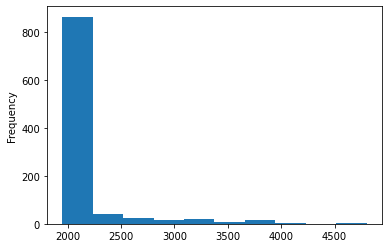

In [67]:
df[df['tariff_name'] == 'ultra']['total_paid'].plot(kind='hist')

Судя по графику в Ultra основную выручку приносит абонентская плата, так же есть небольшие доборы по дополнительным услугам

<AxesSubplot:ylabel='Frequency'>

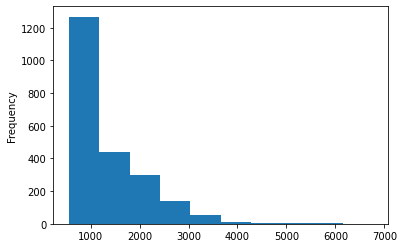

In [68]:
df[df['tariff_name'] == 'smart']['total_paid'].plot(kind='hist', bins=10)

In [69]:
df.groupby('tariff_name')\
  .agg({'total_paid': ['median', 'mean', 'var', 'std']})\
  .style.format('{:.2f}')


Так же в smart,видимо в основном обоненская плата, но так же абоненты докупают или интернет или минуты 

In [70]:
df.groupby('tariff_name')\
  .agg({'month_calls_duration': ['median', 'mean', 'var', 'std']})\
  .style.format('{:.2f}')

<AxesSubplot:ylabel='Frequency'>

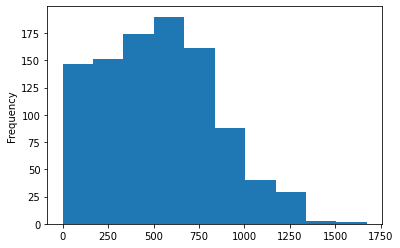

In [71]:
df[df['tariff_name'] == 'ultra']['month_calls_duration'].plot(kind='hist', bins=10)

<AxesSubplot:ylabel='Frequency'>

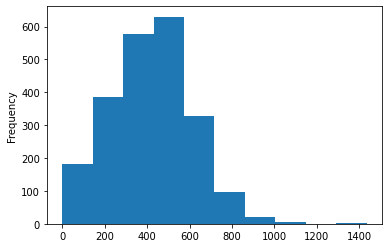

In [72]:
df[df['tariff_name'] == 'smart']['month_calls_duration'].plot(kind='hist', bins=10)

 В smart в среднем выговаривают 422 минуты в месяц из 500 бесплатных, в ultra в среднем выговаривают 518 минут в месяц из 3000 

In [73]:
df.groupby('tariff_name')\
  .agg({'mb_total_in_month': ['median', 'mean', 'var', 'std']})\
  .style.format('{:.2f}')

<AxesSubplot:ylabel='Frequency'>

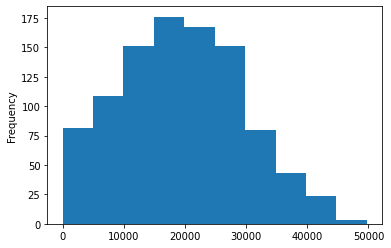

In [74]:
df[df['tariff_name'] == 'ultra']['mb_total_in_month'].plot(kind='hist', bins=10)

<AxesSubplot:ylabel='Frequency'>

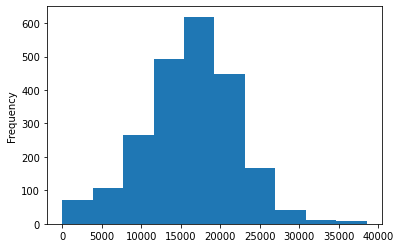

In [75]:
df[df['tariff_name'] == 'smart']['mb_total_in_month'].plot(kind='hist', bins=10)

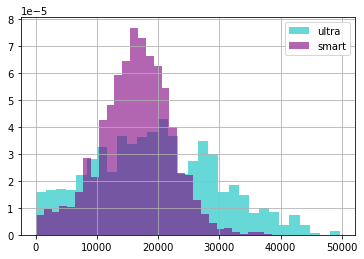

In [76]:
# Код ревьюера

df.loc[df['tariff_name'] == 'ultra','mb_total_in_month'].hist(bins=30, alpha=0.6, color='c', label='ultra', density=True)
df.loc[df['tariff_name'] == 'smart','mb_total_in_month'].hist(bins=30, alpha=0.6, color='purple', label='smart', density=True)
plt.legend()

В smart в среднем используют 17 гб интернета, а в абонентскую плату входит 15,немного докупают, в ultra в среднем используют 20гб , но есть не малое количество людей, которые выходят за рамки 30гб трафика

In [77]:
df.groupby('tariff_name')\
  .agg({'sms_total_in_month': ['median', 'mean', 'var', 'std']})\
  .style.format('{:.2f}')

<AxesSubplot:ylabel='Frequency'>

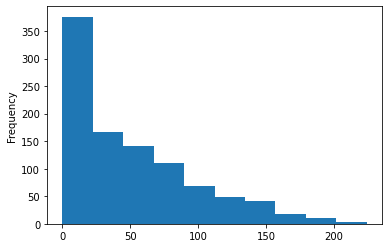

In [78]:
df[df['tariff_name'] == 'ultra']['sms_total_in_month'].plot(kind='hist', bins=10)

<AxesSubplot:ylabel='Frequency'>

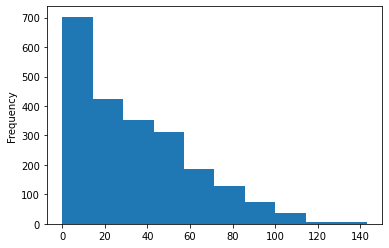

In [79]:
df[df['tariff_name'] == 'smart']['sms_total_in_month'].plot(kind='hist', bins=10)

В smart в среднем используют 33 смс в месяц из 50 бесплатных, в ultra из 1000 бесплатных смс используют только 49 смс в среднем

Можно сделать вывод, что большим спросом по тарифам пользуется интернет и минуты разговора(и то не сильно), 
на смс вообще спроса очень мало, в нынешнее время люди привыкли общаться через интернет

Шаг 4. 

Проверим гипотезы

средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;

средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Пороговое значение alpha задайте самостоятельно.

Поясните:

как вы формулировали нулевую и альтернативную гипотезы;

какой критерий использовали для проверки гипотез и почему.

In [80]:
#Напишем функцию по устранению аномалий
def delete_outliers(df, column, graphic=0, x = 10, y = 10):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    igr = q3 - q1
    igr_test = (df[column] >=(q1 - 1.5 * igr)) & (df[column] <= (q3 +1.5 * igr))
    if graphic == 1:
        return df.loc[igr_test].boxplot([column], figsize=(x,y))
    else:
        return df.loc[igr_test]

Сформулируем гипотезы:

-H0: срелние показатели по выручкам пользователей тарифов "Ультра" и "Смарт" не различается

-H1: срелние показатели по выручкам пользователей тарифов "Ультра" и "Смарт" различается

In [81]:
df.head()

,user_id,month,month_calls_duration,calls_total_in_month,sms_total_in_month,mb_total_in_month,age,churn_date,city,first_name,last_name,reg_date,tariff_name,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,above_the_tariff,total_paid
0,1000,August,408.00,52.00,81.00,"14,055.93",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"
1,1000,December,333.00,46.00,70.00,"9,817.61",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"
2,1000,July,340.00,47.00,75.00,"14,003.64",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"
3,1000,June,172.00,43.00,60.00,"23,233.77",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"
4,1000,May,159.00,22.00,22.00,"2,253.49",52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,1000,30720,3000,1950,150,1,1,0.00,"1,950.00"


In [82]:
ultra = df[df['tariff_name'] == 'ultra']
smart = df[df['tariff_name'] == 'smart']

In [83]:
ultra = delete_outliers(ultra, 'total_paid', 0)
ultra = ultra['total_paid']

In [84]:
smart = delete_outliers(smart, 'total_paid', 0)
smart = smart['total_paid']

In [85]:
alpha = 0.05

In [86]:
results = st.ttest_ind(ultra, smart)

In [87]:
print('р-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение: 6.199325734910118e-155
Отвергаем нулевую гипотезу


In [88]:
odds = ultra.mean() - smart.mean()
print(odds)

703.8416742493175


Выручка тарифов различается по средним показателям примерно на 700 рублей

Гипотеза о равенстве средних двух генеральных совокупностей

-Н0: средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов 

-H1: средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов 

In [89]:
df['city'].unique()

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Курган', 'Барнаул', 'Красноярск', 'Архангельск', 'Липецк',
       'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Волжский', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [90]:
df['region'] = np.where(df['city'] == 'Москва', 'Москва', 'Провинция')

In [91]:
moscow = df[df['region'] == 'Москва']
province = df[df['region'] == 'Провинция']

In [92]:
moscow = delete_outliers(moscow, 'total_paid', 0)
moscow = moscow['total_paid']

In [93]:
province = delete_outliers(province, 'total_paid', 0)
province = province['total_paid']

In [94]:
alpha = 0.05

In [95]:
results = st.ttest_ind(moscow, province)

In [96]:
print('р-значение:', results.pvalue)

if (results.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else: 
    print('Не получилось отвергнуть нулевую гипотезу')

р-значение: 0.29404256281786206
Не получилось отвергнуть нулевую гипотезу


Выручка в Москве и в регионах не отличается

# Общий вывод

   - Использование смс, ни в smart(33 из 50) ни в ultra (49 из 1000) спросом не пользуeтся.
  
   - Выручка в Москве и по регионам не отличается
    
   - Минуты входящие в абонентскую плату в тарифе smart пользователи почти выговаривают, по средним показателям 422 из 500. В тарифе ultra выговаривают не намного больше, в среднем 518 из 3000, что совсем не выгодно абоненту, но выгодно оператору. 
    
   - Интернет и в одном и в другом тарифе пользуется огромным спросом, в тарифе smart используют в среднем 17ГБ в месяц, в абонентскую плату входит 15ГБ трафика, видимо дополнительные траты, которые мы увидели в графике идут как раз на него. В тарифе ultra в среднем используют 20ГБ трафика из входящих в тариф 30ГБ, но есть группы людей которым не хватает и 30ГБ входящего в тариф, а так же не малое количество людей не доходит и до среднего показателя по использованию трафика. Но по графикам тарифов четко видно разное поведение пользователей, если в тарифе ultra на графике более плавное распределение, то в smart пиковый показатель у среднего значения.
    
   - Средняя выручка по тарифу smart составляет 1289р, а абонентская плата всего 550р, пользователи добирают на дополнительные услуги более чем в 2 раза от абонентской платы, но даже не смотря на это smart более выгоден для абонентов чем ultra, в котором только абонентская плата составляет 1950р, а со всеми доплатами за недостающие услуги, а средняя выручка по ним составляет 2070р, при том что абоненты не пользуются всеми благами входящими в их тариф. Средняя выручка по тарифу ultra превышает среднюю выручку по тарифу smart примерно на 700р.
    
   -Для оператора более выгоден тариф ultra, так как абоненты явно переплачивают и недоиспользуют входящие в тариф привилегии и плюс ко всему еще и немалое количество людей докупает дополнительные ГБ трафика.

# Рекомендации оператору:


    
   - Доработать тарифные планы, что бы не потерять клиентов в будующем.
    
   - Не публиковать незашифрованные ФИО. 
   
   - Нулевые минуты округлять до 1
